# OASIS INFOBYTE DATA SCIENCE INTERNSHIP

## AUTHOR : VYSHNAVI K.T

#### TASK 4 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

##### Importing libraries and data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,recall_score

##### Importing the dataset

In [2]:
df=pd.read_csv('spam[1].csv', encoding = ("ISO-8859-1"),low_memory = False)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


##### Exploring the data : Checking the shape, data types, and summary statistics of the dataset

In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


##### Checking for missing values and duplicate rows in the dataset

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

###### Considering the row size, majority of the entries in Unnamed: 2,Unnamed: 3 and Unnamed: 4 are null values.So its better to drop all the three columns

In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.duplicated().sum()

403

######  There are 403 duplicate values, we have to remove them

In [9]:
df.drop_duplicates(keep='first',inplace=True)
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

##### Renaming the columns

In [13]:
df.rename(columns={'v1':'type','v2':'text'},inplace = True)
df.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


##### Converting type into numerical values

In [14]:
df.loc[df['type']=='spam','type']=0
df.loc[df['type']=='ham','type']=1
df.head(3)

,type,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [15]:
df['type']=df['type'].astype('int')

##### Data Visualization

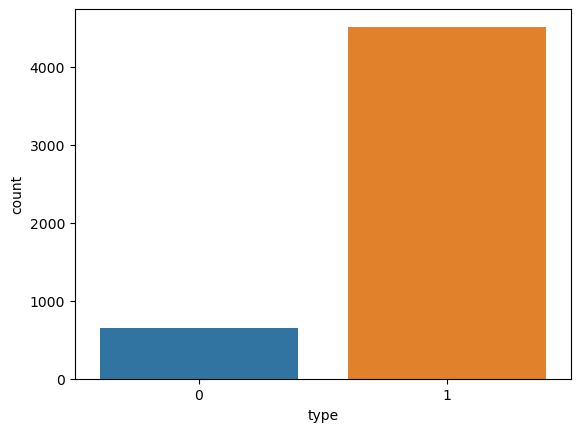

In [16]:
sns.countplot(x=df['type'])
plt.show()

##### Model Building

##### Split the dataset into train and test sets.

In [17]:
x=df['text']
x.head(3)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: text, dtype: object

In [18]:
y=df['type']
y.head(3)

0    1
1    1
2    0
Name: type, dtype: int32

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=7)

##### Create a TF-IDF vectorizer to convert text messages into numerical features

In [21]:
vector=TfidfVectorizer()
vector.fit(x_train)

TfidfVectorizer()

##### Convert the train and test text messages into numerical features using TF-IDF

In [23]:
x_transformed=vector.transform(x_train.values)
x_transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
x_test_transformed=vector.transform(x_test)

##### Using Support Vector Machine to build our model

In [26]:
svmmodel=svm.SVC()
svmmodel.fit(x_transformed,y_train)

SVC()

In [27]:
svm_pred=svmmodel.predict(x_test_transformed)

##### Evaluating the model using accuracy, precision, recall, and f1 score.

In [28]:
print('Classification Report\n')
print(classification_report(svm_pred,y_test))

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       174
           1       1.00      0.97      0.99      1377

    accuracy                           0.98      1551
   macro avg       0.91      0.98      0.94      1551
weighted avg       0.98      0.98      0.98      1551



In [29]:
print('Accuracy=',accuracy_score(svm_pred,y_test))

Accuracy= 0.9754996776273372


##### Using the confusion matrix

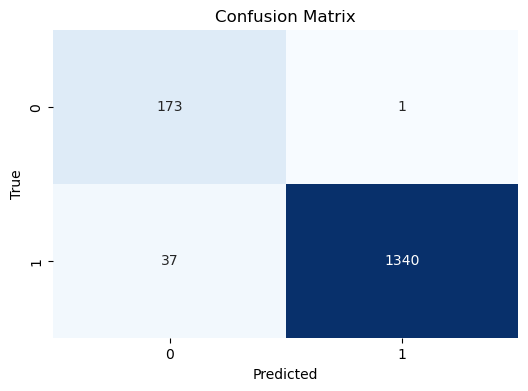

In [30]:
cm=confusion_matrix(svm_pred,y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###### Conclusion : Our model is 97.55% accurate and have high value for precision, recall and f1 score. The confusion matrix of our model is also good.